In [10]:
import os

# Zeige das aktuelle Arbeitsverzeichnis an
print("Aktuelles Verzeichnis:", os.getcwd())


Aktuelles Verzeichnis: C:\Users\adam8\OneDrive\programmieren\coding\python\Statistik\testat1


In [11]:
# Setze das aktuelle Arbeitsverzeichnis
os.chdir(r"C:\Users\adam8\OneDrive\programmieren\coding\python\Statistik\testat1")


In [12]:
import pandas as pd
from chardet.universaldetector import UniversalDetector

# Bestimmen Sie das Encoding automatisch
detector = UniversalDetector()
with open("sr_aufg_1_54.txt", 'rb') as file:
    for line in file:
        detector.feed(line)
        if detector.done:
            break
    detector.close()

# Zeige das ermittelte Encoding
print(f"Erkanntes Encoding: {detector.result['encoding']}")

# Versuche, die Datei mit dem erkannten Encoding zu laden
df = pd.read_csv("sr_aufg_1_54.txt", sep=";", encoding=detector.result['encoding'])

# Zeige die ersten Zeilen der geladenen DataFrame an
print("Spaltennamen:", df.columns.tolist())
print(df.head())


Erkanntes Encoding: ISO-8859-1
Spaltennamen: ['001', 'Herr', 'Torsten Köhler', '24.01.1974']
    001     Herr Torsten Köhler  24.01.1974
2  Frau    Diana       Bergmann  31.01.1951
3  Frau    Hanna       Albrecht  05.12.1958
4  Frau  Jessica          Barth  15.11.1976
5  Herr     Wolf        Schmitt  05.12.1961
6  Herr   Konrad        Steiner  07.11.1964


In [13]:
import pandas as pd

# === 1. Datei korrekt einlesen ===
spalten = ["Personalnummer", "Anrede", "Vorname", "Nachname", "Geburtsdatum"]
df = pd.read_csv("sr_aufg_1_54.txt", sep=";", encoding="latin1", header=None, names=spalten)

# Strip Leerzeichen aus Spaltennamen
df.columns = df.columns.str.strip()

# === 2. Geburtsdatum als Datum parsen ===
df["Geburtsdatum_Parsed"] = pd.to_datetime(df["Geburtsdatum"], errors="coerce", dayfirst=True)

# === 3. Fehlerhafte Datensätze anzeigen (vor Korrektur) ===
# Fehlerhafte Daten sind solche, bei denen das Geburtsdatum 'NaT' (Not a Time) ist oder nicht im richtigen Format vorliegt
# Auch Geburtsdaten, die in der Zukunft oder sehr alt sind, werden als fehlerhaft betrachtet.
fehlerhaft = df[df["Geburtsdatum_Parsed"].isna() | (df["Geburtsdatum_Parsed"] > pd.to_datetime("today")) | (df["Geburtsdatum_Parsed"] < pd.to_datetime("1900-01-01"))]

print("\n❌ Fehlerhafte Datensätze (vor Korrektur):")
print(fehlerhaft[["Personalnummer", "Vorname", "Nachname", "Geburtsdatum"]])

# === 4. Manuelle Korrektur fehlerhafter Einträge ===
manuelle_korrekturen = {
    0: {"Vorname": "Torsten", "Nachname": "Köhler", "Geburtsdatum": "24.01.1974"},  # Torsten Köhler
    38: {"Vorname": "Martina", "Nachname": "Baier", "Geburtsdatum": "24.07.1974"},  # Martina Baier
    80: {"Vorname": "Tim", "Nachname": "Schwan", "Geburtsdatum": "16.01.1943"},     # Tim Schwan
    108: {"Vorname": "Astrid", "Nachname": "Büchner", "Geburtsdatum": "03.12.1969"},  # Astrid Büchner
}

# Korrekturen durchführen
for index, korrekturen in manuelle_korrekturen.items():
    df.at[index, "Vorname"] = korrekturen["Vorname"]
    df.at[index, "Nachname"] = korrekturen["Nachname"]
    df.at[index, "Geburtsdatum"] = korrekturen["Geburtsdatum"]

# === 5. Fehlerhafte Datensätze nach Korrektur anzeigen ===
# Erneut das Geburtsdatum parsen
df["Geburtsdatum_Parsed"] = pd.to_datetime(df["Geburtsdatum"], errors="coerce", dayfirst=True)

# Nochmals fehlerhafte Datensätze prüfen
fehlerhaft_nach_korrektur = df[df["Geburtsdatum_Parsed"].isna() | (df["Geburtsdatum_Parsed"] > pd.to_datetime("today")) | (df["Geburtsdatum_Parsed"] < pd.to_datetime("1900-01-01"))]

print("\n❌ Noch verbleibende fehlerhafte Datensätze (nach Korrektur):")
print(fehlerhaft_nach_korrektur[["Personalnummer", "Vorname", "Nachname", "Geburtsdatum"]])

# === 6. Endgültiges Löschen der fehlerhaften Datensätze ===
# Entfernen der fehlerhaften Datensätze (z.B. 'NaT', zu alte oder zu zukünftige Geburtsdaten)
df_clean = df[~df["Geburtsdatum_Parsed"].isna() & (df["Geburtsdatum_Parsed"] <= pd.to_datetime("today")) & (df["Geburtsdatum_Parsed"] >= pd.to_datetime("1900-01-01"))]

# === 7. Zusammenfassung der Bereinigung ===
# Bereinigte Daten anzeigen
print(f"\n✅ Bereinigte Daten: {len(df_clean)} Zeilen gültig.")

# Anzahl der Zeilen, die entfernt wurden (fehlerhafte Datensätze)
removed_rows = len(df) - len(df_clean)
print(f"❌ Entfernte fehlerhafte Datensätze: {removed_rows} Zeilen")

# Gesamtdaten vor Bereinigung
print(f"\n📊 Gesamte Anzahl der Datensätze vor der Bereinigung: {len(df)} Zeilen")

# Bereinigte Daten anzeigen (optional)
print("\n🎉 Bereinigte Daten (erste 5 Zeilen):")
print(df_clean.head())



❌ Fehlerhafte Datensätze (vor Korrektur):
     Personalnummer         Vorname    Nachname          Geburtsdatum
0                 1  Torsten Köhler  24.01.1974                   NaN
11               12          Dagmar       Sauer            irGByNkbjn
12               13           Marie     Schramm            21.12.19zy
16               17       Siegfried      Glaser            28.02.2239
38               39   Martina Baier  24.07.1974                   NaN
67               68         Patrick        Fink                      
70               71           Heike      Herbst           09.09.25402
78               79            Mira       Baier            25.09.1513
80               81             Tim      Schwan    January 16th, 1943
88               89          Werner      Ritter             09.12.412
106             107         Michael     Steiner                28.03.
108             109          Astrid     Büchner  am 03. Dezember 1969

❌ Noch verbleibende fehlerhafte Datensätze (na

In [19]:
stichtag = pd.to_datetime("31.12.2005", dayfirst=True)

df_clean["Alter_2005"] = df_clean["Geburtsdatum_Parsed"].apply(
    lambda geb: stichtag.year - geb.year - ((stichtag.month, stichtag.day) < (geb.month, geb.day))
)


In [20]:
bins = [0, 20, 30, 40, 50, 200]
labels = ["≤20", "21–30", "31–40", "41–50", ">50"]
df_clean["Altersgruppe"] = pd.cut(df_clean["Alter_2005"], bins=bins, labels=labels, right=True)




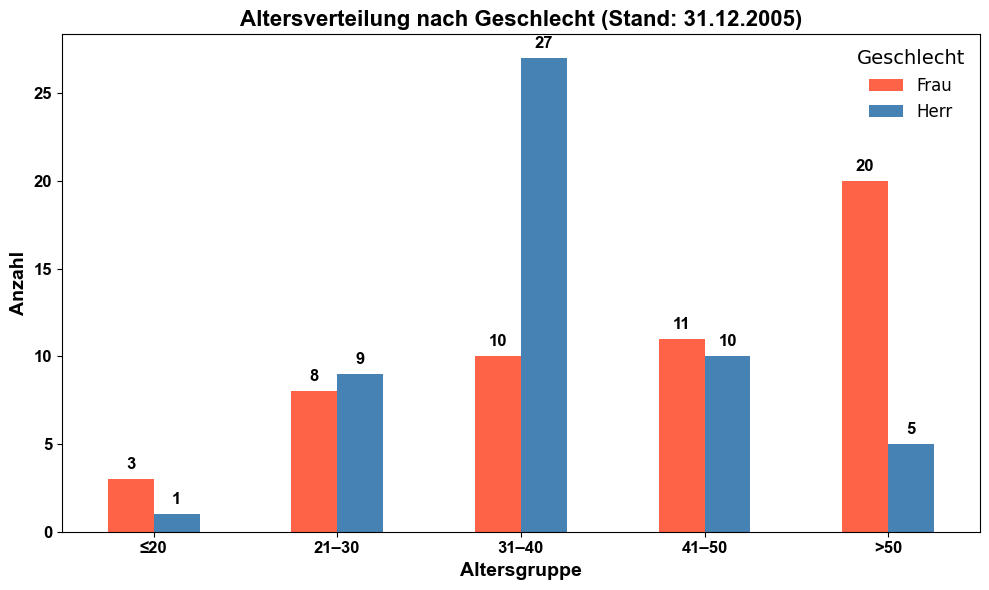

In [16]:
import matplotlib.pyplot as plt

# Gruppieren nach Altersgruppe und Geschlecht, explizit "observed=False" setzen
grouped = df_clean.groupby(["Altersgruppe", "Anrede"], observed=False).size().unstack().fillna(0)

# Plot mit schöneren Farben und Schriften
fig, ax = plt.subplots(figsize=(10, 6))

# Wähle Farben: Rot für Frauen, Blau für Männer
colors = ["#FF6347", "#4682B4"]  # Vibrante Farben: Rot und Blau

# Erstelle das Balkendiagramm
bars = grouped.plot(kind="bar", ax=ax, color=colors)

# Titel und Achsenbeschriftung
plt.title("Altersverteilung nach Geschlecht (Stand: 31.12.2005)", fontsize=16, fontweight='bold', family='Arial')
plt.xlabel("Altersgruppe", fontsize=14, fontweight='bold', family='Arial')
plt.ylabel("Anzahl", fontsize=14, fontweight='bold', family='Arial')

# Setze die Schriftgröße der Ticklabels
plt.xticks(rotation=0, fontsize=12, fontweight='bold', family='Arial')
plt.yticks(fontsize=12, fontweight='bold', family='Arial')

# Zahlen über den Balken hinzufügen
for p in bars.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5),  # Abstand von der Zahl zum Balken
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', family='Arial', color='black')

# Legende anpassen
plt.legend(title="Geschlecht", title_fontsize=14, fontsize=12, loc='upper right', frameon=False)

# Enge Layouts für bessere Darstellung
plt.tight_layout()

# Diagramm anzeigen
plt.show()


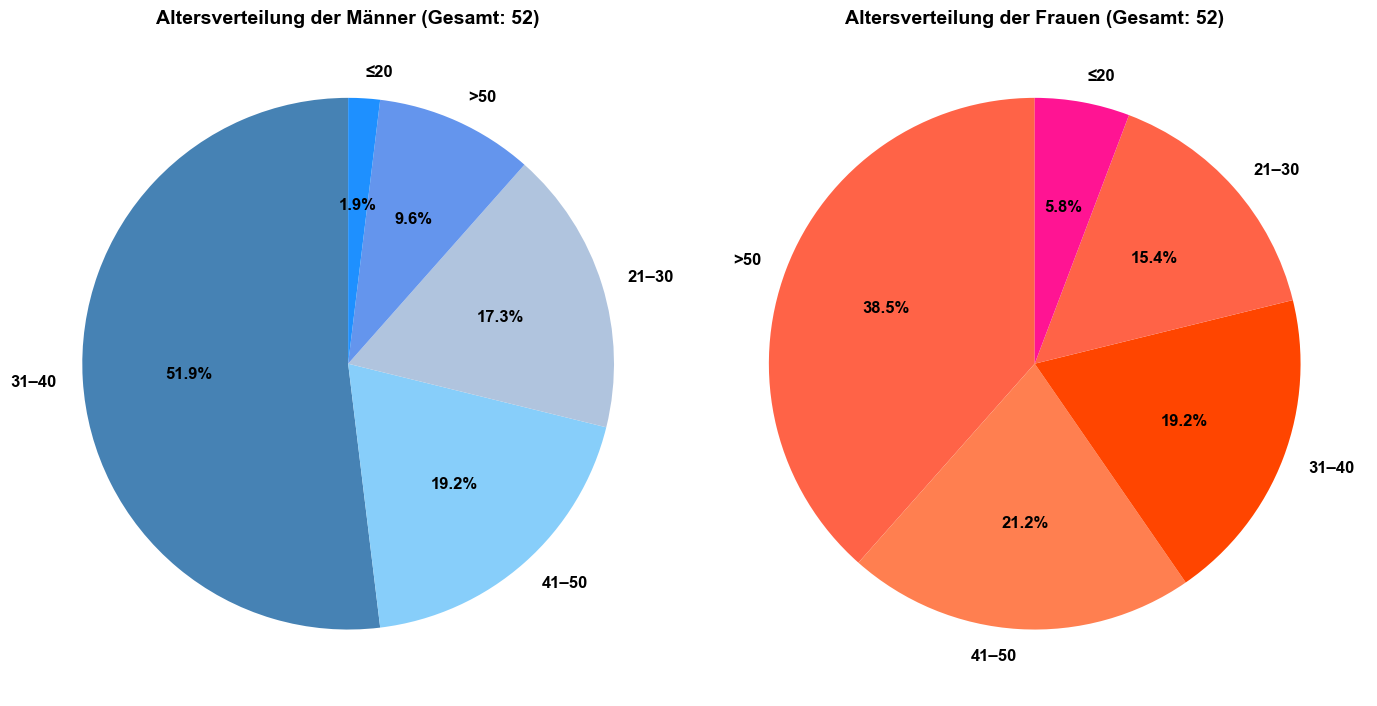

In [17]:
import matplotlib.pyplot as plt

# Filter für Männer und Frauen
df_men = df_clean[df_clean["Anrede"] == "Herr"]
df_women = df_clean[df_clean["Anrede"] == "Frau"]

# Altersverteilung für Männer und Frauen berechnen
age_distribution_men = df_men["Altersgruppe"].value_counts()
age_distribution_women = df_women["Altersgruppe"].value_counts()

# Berechne die Anteile für jedes Tortendiagramm
men_total = age_distribution_men.sum()
women_total = age_distribution_women.sum()

# Labels und Werte für die Tortendiagramme
labels_men = age_distribution_men.index
sizes_men = age_distribution_men.values

labels_women = age_distribution_women.index
sizes_women = age_distribution_women.values

# Plot für Männer
fig,ax = plt.subplots(1, 2, figsize=(14, 7))

# Männer Tortendiagramm
ax[0].pie(sizes_men, labels=labels_men, autopct='%1.1f%%', startangle=90,
          colors=["#4682B4", "#87CEFA", "#B0C4DE", "#6495ED", "#1E90FF"],
          textprops={'fontsize': 12, 'fontweight': 'bold', 'family': 'Arial'})
ax[0].set_title(f"Altersverteilung der Männer (Gesamt: {men_total})", fontsize=14, fontweight='bold', family='Arial')

# Plot für Frauen
# Frauen Tortendiagramm
ax[1].pie(sizes_women, labels=labels_women, autopct='%1.1f%%', startangle=90,
          colors=["#FF6347", "#FF7F50", "#FF4500", "#FF6347", "#FF1493"],
          textprops={'fontsize': 12, 'fontweight': 'bold', 'family': 'Arial'})
ax[1].set_title(f"Altersverteilung der Frauen (Gesamt: {women_total})", fontsize=14, fontweight='bold', family='Arial')

# Diagramm anzeigen
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
from datetime import datetime

# Sicherstellen, dass das Geburtsdatum als Datetime interpretiert wird
df_clean['Geburtsdatum'] = pd.to_datetime(df_clean['Geburtsdatum'], errors='coerce')  # Fehlerhafte Daten werden als NaT behandelt

# Berechnung des Alters im Jahr 2005
reference_date = datetime(2005, 12, 31)
df_clean['Alter_2005'] = df_clean['Geburtsdatum'].apply(lambda x: (reference_date - x).days // 365 if pd.notnull(x) else None)

# Entfernen von NaN-Werten, die durch fehlerhafte Daten entstehen könnten
df_clean = df_clean.dropna(subset=['Alter_2005'])

# Berechnung der Kennzahlen für alle Beschäftigten
mean_all = df_clean['Alter_2005'].mean()
var_all = df_clean['Alter_2005'].var()  # Berechnung der Varianz
std_dev_all = df_clean['Alter_2005'].std()  # Berechnung der Standardabweichung
median_all = df_clean['Alter_2005'].median()
range_all = df_clean['Alter_2005'].max() - df_clean['Alter_2005'].min()

# Berechnung der Kennzahlen für Männer
df_men = df_clean[df_clean['Anrede'] == 'Herr']
mean_men = df_men['Alter_2005'].mean()
var_men = df_men['Alter_2005'].var()
std_dev_men = df_men['Alter_2005'].std()
median_men = df_men['Alter_2005'].median()
range_men = df_men['Alter_2005'].max() - df_men['Alter_2005'].min()

# Berechnung der Kennzahlen für Frauen
df_women = df_clean[df_clean['Anrede'] == 'Frau']
mean_women = df_women['Alter_2005'].mean()
var_women = df_women['Alter_2005'].var()
std_dev_women = df_women['Alter_2005'].std()
median_women = df_women['Alter_2005'].median()
range_women = df_women['Alter_2005'].max() - df_women['Alter_2005'].min()

# Formatierte Ausgabe als Tabelle mit Emojis und gut strukturiert
summary_data = {
    "🔢 Kennzahl": ["Mittelwert", "Empirische Varianz", "Empirische Standardabweichung", "Median", "Spannweite"],
    "👥 Alle Beschäftigte": [mean_all, var_all, std_dev_all, median_all, range_all],
    "👨‍💻 Männer": [mean_men, var_men, std_dev_men, median_men, range_men],
    "👩‍💻 Frauen": [mean_women, var_women, std_dev_women, median_women, range_women]
}

# Erstellen eines DataFrames zur besseren Darstellung
summary_df = pd.DataFrame(summary_data)

# Formatierte Ausgabe der Tabelle mit klareren Spaltenüberschriften
print("\033[1m📊 Kennzahlen für Altersdaten der Beschäftigten 📊\033[0m")  # Titel fett (bold)
print(summary_df.to_string(index=False, float_format="%.2f"))


📊 Kennzahlen für Altersdaten der Beschäftigten 📊
                   🔢 Kennzahl  👥 Alle Beschäftigte  👨‍💻 Männer  👩‍💻 Frauen
                   Mittelwert                40.24       37.15       43.33
           Empirische Varianz               148.09      104.96      174.69
Empirische Standardabweichung                12.17       10.24       13.22
                       Median                38.00       36.50       47.00
                   Spannweite                46.00       44.00       46.00
